# organizing data
rahul goswami

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
np.random.seed(123)
import os
import shutil
from collections import defaultdict

In [2]:
# os.mkdir('train_data')

In [3]:
cls_df = pd.read_csv("meta-data/sample_submission.csv")
cls = cls_df.columns

In [4]:
cls

Index(['image_id', 'antelope', 'bat', 'beaver', 'bobcat', 'buffalo',
       'chihuahua', 'chimpanzee', 'collie', 'dalmatian', 'german+shepherd',
       'grizzly+bear', 'hippopotamus', 'horse', 'killer+whale', 'mole',
       'moose', 'mouse', 'otter', 'ox', 'persian+cat', 'raccoon', 'rat',
       'rhinoceros', 'seal', 'siamese+cat', 'spider+monkey', 'squirrel',
       'walrus', 'weasel', 'wolf'],
      dtype='object')

In [5]:
cls = list(cls)
cls.remove('image_id')

In [6]:
len(cls)

30

In [7]:
# for cname in cls:
#     os.mkdir('valid_data/' + cname)    
#     os.mkdir('train_data/' + cname)
#     os.mkdir('test_data/' + cname)    

In [8]:
df = pd.read_csv("meta-data/train.csv")
df.set_index("Image_id")
df

,Image_id,Animal
0,Img-1.jpg,hippopotamus
1,Img-2.jpg,squirrel
2,Img-3.jpg,grizzly+bear
3,Img-4.jpg,ox
4,Img-5.jpg,german+shepherd
5,Img-6.jpg,buffalo
6,Img-7.jpg,otter
7,Img-8.jpg,bobcat
8,Img-9.jpg,wolf
9,Img-10.jpg,persian+cat


In [9]:
clscnt = defaultdict(int)
for i, cname in enumerate(df["Animal"]):
    clscnt[cname] += 1
#     source_path = "train/Img-{}.jpg".format(i + 1)
#     dest_path = "train_data/{0}/{0}_{1}".format(cname, clscnt[cname])
#     print(source_path, dest_path)
    # Move file
#     shutil.copyfile(source_path, dest_path)
    if (i + 1) % 1000 == 0:
        print('Copied', i + 1, 'out of 13,000 files')

Copied 1000 out of 13,000 files
Copied 2000 out of 13,000 files
Copied 3000 out of 13,000 files
Copied 4000 out of 13,000 files
Copied 5000 out of 13,000 files
Copied 6000 out of 13,000 files
Copied 7000 out of 13,000 files
Copied 8000 out of 13,000 files
Copied 9000 out of 13,000 files
Copied 10000 out of 13,000 files
Copied 11000 out of 13,000 files
Copied 12000 out of 13,000 files
Copied 13000 out of 13,000 files


In [10]:
clscnt

defaultdict(int,
            {'antelope': 695,
             'bat': 256,
             'beaver': 133,
             'bobcat': 418,
             'buffalo': 606,
             'chihuahua': 386,
             'chimpanzee': 477,
             'collie': 680,
             'dalmatian': 359,
             'german+shepherd': 687,
             'grizzly+bear': 583,
             'hippopotamus': 464,
             'horse': 1111,
             'killer+whale': 193,
             'mole': 60,
             'moose': 476,
             'mouse': 124,
             'otter': 519,
             'ox': 501,
             'persian+cat': 491,
             'raccoon': 346,
             'rat': 220,
             'rhinoceros': 477,
             'seal': 665,
             'siamese+cat': 341,
             'spider+monkey': 189,
             'squirrel': 808,
             'walrus': 148,
             'weasel': 184,
             'wolf': 403})

In [11]:
print(sum(clscnt.values()))

13000


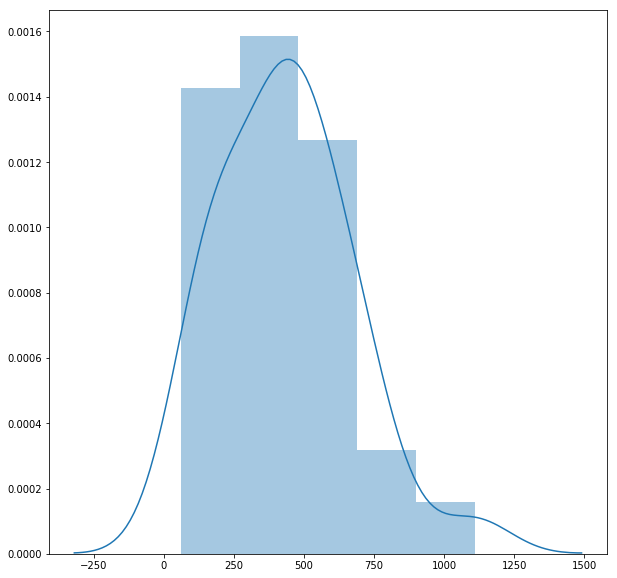

In [12]:
plt.figure(figsize=(10, 10))
sns.distplot(pd.DataFrame.from_dict(clscnt, orient='index'), hist=True)

## rename files to end with .jpg

In [13]:
# clscnt = defaultdict(int)
# for cname in df["Animal"]:
#     clscnt[cname] += 1
#     source_path = "train_data/{0}/{0}_{1}".format(cname, clscnt[cname])
#     dest_path = "train_data/{0}/{0}_{1}.jpg".format(cname, clscnt[cname])
#     os.rename(source_path, dest_path)
#     # Move file
# #     shutil.copyfile(source_path, dest_path)
# #     if (i + 1) % 1000 == 0:
# #         print('Copied', i + 1, 'out of 13,000 files')

## Move some images to valid and test set

In [17]:
test_ratio, valid_ratio = 0.2, 0.2 
for cls in clscnt:
    no_imgs = clscnt[cls]
    lst = list(range(1, no_imgs + 1))
    random.shuffle(lst)
    test_i = int(no_imgs * test_ratio)
    test_d = lst[:test_i]
    lst = lst[test_i:]
    valid_i = int(no_imgs * valid_ratio)
    valid_d = lst[:valid_i]
    print(cls, no_imgs, test_i, len(test_d), valid_i, len(valid_d))
    
    for i in test_d:
        source_path = "train_data/{0}/{0}_{1}.jpg".format(cls, i)
        dest_path = "test_data/{0}/{0}_{1}.jpg".format(cls, i)
        os.rename(source_path, dest_path)
    for i in valid_d:
        source_path = "train_data/{0}/{0}_{1}.jpg".format(cls, i)
        dest_path = "valid_data/{0}/{0}_{1}.jpg".format(cls, i)
        os.rename(source_path, dest_path)
        
    

hippopotamus 464 92 92 92 92
squirrel 808 161 161 161 161
grizzly+bear 583 116 116 116 116
ox 501 100 100 100 100
german+shepherd 687 137 137 137 137
buffalo 606 121 121 121 121
otter 519 103 103 103 103
bobcat 418 83 83 83 83
wolf 403 80 80 80 80
persian+cat 491 98 98 98 98
collie 680 136 136 136 136
antelope 695 139 139 139 139
seal 665 133 133 133 133
dalmatian 359 71 71 71 71
siamese+cat 341 68 68 68 68
moose 476 95 95 95 95
horse 1111 222 222 222 222
killer+whale 193 38 38 38 38
mouse 124 24 24 24 24
walrus 148 29 29 29 29
beaver 133 26 26 26 26
rhinoceros 477 95 95 95 95
chimpanzee 477 95 95 95 95
weasel 184 36 36 36 36
spider+monkey 189 37 37 37 37
raccoon 346 69 69 69 69
rat 220 44 44 44 44
chihuahua 386 77 77 77 77
mole 60 12 12 12 12
bat 256 51 51 51 51
